In [2]:
cd fastdata

/home/jjjeevan/NLP-project/fastdata


In [9]:
from fastai.text import * 
path = ""

In [31]:
import pandas as pd

train=pd.read_csv('train.csv')
train =  train.dropna()
nan_cols = [train[train.isna().any(axis=1)]]
nan_cols
train.to_csv("train.csv", index=False)

In [42]:
data_lm = TextLMDataBunch.from_csv(path, 'train.csv', text_cols=1)

In [43]:
data_clas = TextClasDataBunch.from_csv(path, 'train.csv', vocab=data_lm.train_ds.vocab, bs=32, text_cols=1, label_cols=0)

In [44]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')
data_lm = load_data(path, 'data_lm_export.pkl')
data_clas = load_data(path, 'data_clas_export.pkl', bs=16)

In [45]:
#learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn = language_model_learner(data_lm, Transformer, drop_mult=0.5)

/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


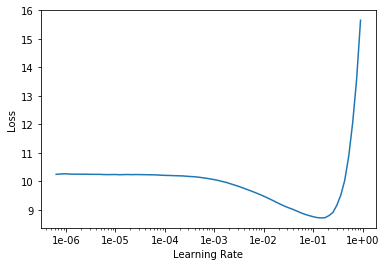

In [46]:
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.622066,5.784450,0.090446,04:06
1,6.270316,5.302551,0.126942,04:06
2,5.625572,5.043981,0.155938,04:06
3,5.188965,4.889647,0.169777,04:07
4,4.894226,4.859490,0.172701,04:07


/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch

In [48]:
learn.save_encoder('ft_enc')

In [49]:
learn = text_classifier_learner(data_clas, Transformer, drop_mult=0.5)
learn.load_encoder('ft_enc')
data_clas.show_batch()

text,target
xxbos * xxup rdj - xxmaj iron xxmaj man * xxmaj evans - xxmaj the xxmaj winter xxmaj soldier * xxmaj hemsworth - xxmaj infinity xxmaj war * xxmaj johansson - xxmaj endgame * xxmaj ruffalo - xxmaj the xxmaj avengers * xxmaj renner - xxmaj endgame * xxmaj cheadle - xxmaj iron xxmaj man 2 * xxmaj stan - xxmaj civil xxmaj war * xxmaj olsen - xxmaj infinity,1
"xxbos xxmaj gotcha ! xxmaj thanks so much for the help ! i ve been on the xxunk for a bit . xxmaj had been holding out for a phase 3 box set similar to the first two they did , so i passed on the xxmaj infinity xxmaj saga set , but it seems just a phase 3 set is nt coming so i guess these are my next",1
"xxbos xxmaj people complain about xxmaj captain xxmaj marvel but i usually do nt hear the same complaints about xxmaj thors ( equally awesome ) entrance in xxmaj infinity xxmaj war . xxmaj thor came pretty close to killing a xxmaj thanos wielding the gauntlet . i think its only because he failed that people do nt feel it was cheap . xxmaj captain xxmaj marvel failed too , but",2
"xxbos xxmaj the unit that dealt with non - xxup mcu xxmaj marvel films could 've been dissolved , but xxmaj marvel xxmaj entertainment still exists . xxmaj everything that is not xxmaj marvel xxmaj studios ( xxmaj marvel xxmaj television and xxmaj marvel xxmaj animation are now xxunk of xxmaj marvel xxmaj studios ) is still owned by xxmaj marvel xxmaj entertainment . xxmaj marvel xxmaj entertainment is the",3
"xxbos i think it had more to do with her vision of the character . xxmaj and , to be honest , i feel like that being the source of the decision actually made it a good idea for the film . i mean , half of the movie was about how the corporate world is destroying everything . xxmaj her xxunk to step out of that world , despite",3


In [51]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.238479,1.188301,0.524183,06:29


In [55]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.207748,1.226566,0.524183,08:35
1,1.196941,1.181945,0.524183,11:00
2,1.193672,1.180398,0.524183,07:56
3,1.206532,1.180093,0.524183,07:49
4,1.215885,1.190451,0.524183,09:35


In [54]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.185143,1.212628,0.524183,07:23


In [ ]:
learn.freeze_to(-2)
learn.fit(1, 3e-1)

In [53]:
learn.show_results()

text,target,prediction
"xxbos xxmaj that or learn from xxmaj frigga how to do it . xxmaj she already xxunk time travel is nothing new to her . a minor point , but the ability to * xxunk * time differently does not mean she has any experience or knowledge of time travel . xxmaj to quote xxmaj loki in * xxmaj thor : xxmaj ragnarok * ( whilst trying to track down",1,1
"xxbos xxmaj he goes to xxmaj earth to help the xxmaj avengers , xxunk they have held their ground in protecting the stones up to this point . xxmaj going to xxmaj titan , based on what he knows , likely means facing xxmaj thanos alone . xxmaj instead , he wants to force xxmaj thanos to come to him , so he xxunk the xxmaj avengers can fight him",1,1
"xxbos xxmaj not the only reason , xxmaj captain xxmaj marvel can xxunk what is thrown at her . xxmaj so , the more powerful of a shot xxmaj scarlet xxmaj witch tries to put down , just makes xxmaj captain xxmaj marvel stronger . xxmaj its why she can make xxmaj thanos have a moment doubt when they go toe to toe , whatever he s xxunk out ,",1,1
"xxbos i do nt . xxmaj we ve had xxmaj doctor xxmaj doom as the primary villain in literally every xxmaj fantastic xxmaj four movie ever made . xxmaj when we do get an xxup f4 reboot in the xxup mcu , i do nt want them to go against xxmaj doom right away . xxmaj use any other of their long list of villains for the first xxunk and",1,1
"xxbos i thought xxmaj tony and xxmaj pepper 's development was mostly fine , it was the subplot the xxmaj russos put in about xxmaj pepper not wanting xxmaj tony to be xxmaj iron xxmaj man which made no sense since she was ok with him being xxmaj iron xxmaj man before xxmaj civil xxmaj war ( xxmaj pepper never had a problem with xxmaj iron xxmaj man , she",1,1
